In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")  

In [2]:
root_path = "/home/basia/Desktop/cross-adaptation/experiments/data/tabular/processed"
datasets = os.listdir(os.path.join(root_path, 'train'))
data = {
        dataset[:-4]: pd.concat([
            pd.read_csv(os.path.join(root_path, 'train', dataset), index_col=0),
            pd.read_csv(os.path.join(root_path, 'test', dataset), index_col=0)
        ], ignore_index=True)
        for dataset in datasets 
    }


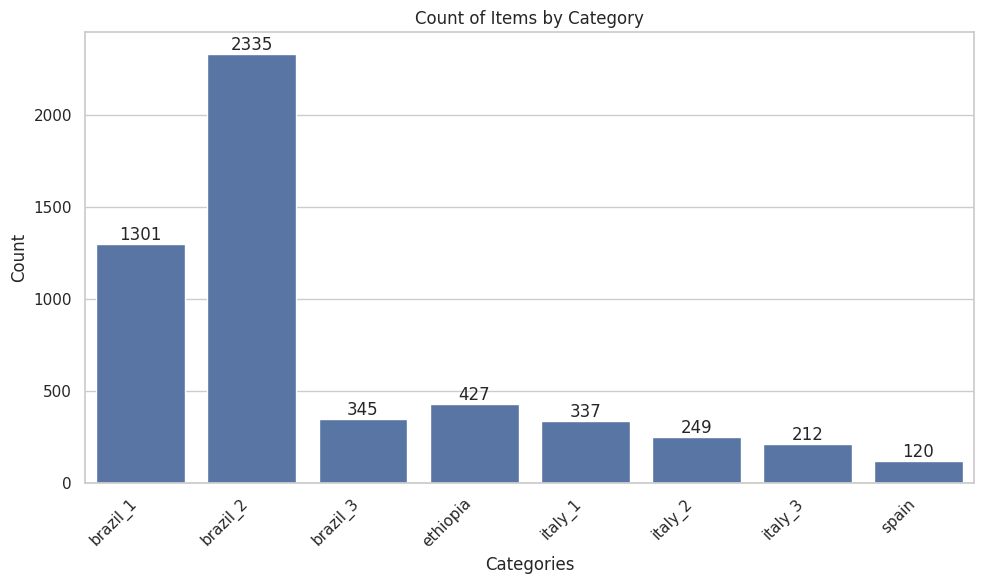

In [3]:
# Create the counts dictionary and sort it alphabetically
counts = {k: len(v.index) for k, v in data.items()}
counts = dict(sorted(counts.items()))  # Sort by keys alphabetically

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))

# Customize the plot
plt.title('Count of Items by Category')
plt.xlabel('Categories')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(counts.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
for k, v in data.items():
    print(f"Missing values in {k}: {v.isnull().sum()}")

    # For percentage of missing values
    print("\nPercentage of missing values:")
    print(v.isnull().sum() / len(v) * 100)

Missing values in italy_2: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC       0
PLT       0
NE        0
LY        0
MO        0
EO        0
BA        0
target    0
dtype: int64

Percentage of missing values:
HCT       0.0
HGB       0.0
MCH       0.0
MCHC      0.0
MCV       0.0
RBC       0.0
WBC       0.0
PLT       0.0
NE        0.0
LY        0.0
MO        0.0
EO        0.0
BA        0.0
target    0.0
dtype: float64
Missing values in spain: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC       0
PLT       0
NE        0
LY        0
MO        0
EO        0
BA        0
target    0
dtype: int64

Percentage of missing values:
HCT       0.0
HGB       0.0
MCH       0.0
MCHC      0.0
MCV       0.0
RBC       0.0
WBC       0.0
PLT       0.0
NE        0.0
LY        0.0
MO        0.0
EO        0.0
BA        0.0
target    0.0
dtype: float64
Missing values in italy_3: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC

In [5]:
for k, v in data.items():
    print(f"Missing values in {k}: {v.isnull().sum()}")

    # For percentage of missing values
    print("\nPercentage of missing values:")
    print(v.isnull().sum() / len(v) * 100)

Missing values in italy_2: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC       0
PLT       0
NE        0
LY        0
MO        0
EO        0
BA        0
target    0
dtype: int64

Percentage of missing values:
HCT       0.0
HGB       0.0
MCH       0.0
MCHC      0.0
MCV       0.0
RBC       0.0
WBC       0.0
PLT       0.0
NE        0.0
LY        0.0
MO        0.0
EO        0.0
BA        0.0
target    0.0
dtype: float64
Missing values in spain: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC       0
PLT       0
NE        0
LY        0
MO        0
EO        0
BA        0
target    0
dtype: int64

Percentage of missing values:
HCT       0.0
HGB       0.0
MCH       0.0
MCHC      0.0
MCV       0.0
RBC       0.0
WBC       0.0
PLT       0.0
NE        0.0
LY        0.0
MO        0.0
EO        0.0
BA        0.0
target    0.0
dtype: float64
Missing values in italy_3: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC

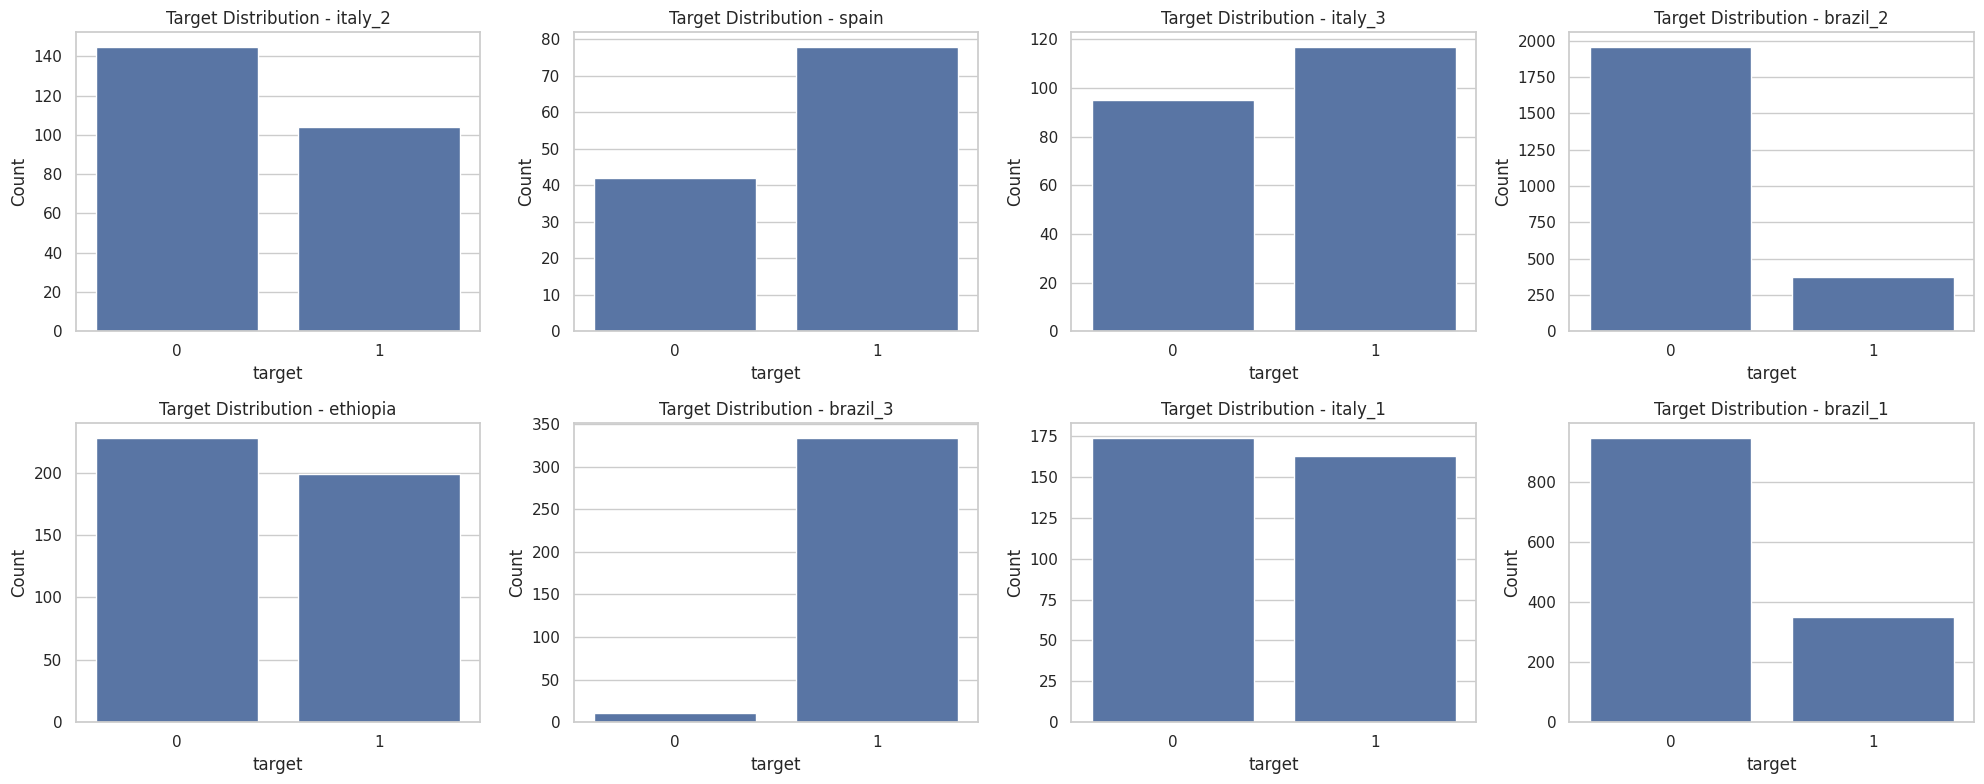

In [6]:
num_cols = (len(data) + 1) // 2  # Calculate number of columns needed
fig, axes = plt.subplots(2, num_cols, figsize=(5*num_cols, 8))
axes = axes.flatten()  # Flatten 2D array to 1D for easier iteration

# Hide extra subplots if odd number of datasets
if len(data) % 2 != 0:
    axes[-1].set_visible(False)

for ax, (name, df) in zip(axes, data.items()):
    sns.countplot(data=df, x="target", ax=ax)
    ax.set_title(f'Target Distribution - {name}')
    ax.set_ylabel('Count')
    
    # Add percentage labels on top of bars
    total = len(df)
    # for p in ax.patches:
    #     percentage = f'{100 * p.get_height() / total:.1f}%'
    #     ax.annotate(percentage,
    #                (p.get_x() + p.get_width() / 2., p.get_height()),
    #                ha='center', va='bottom')

plt.tight_layout()
plt.show()

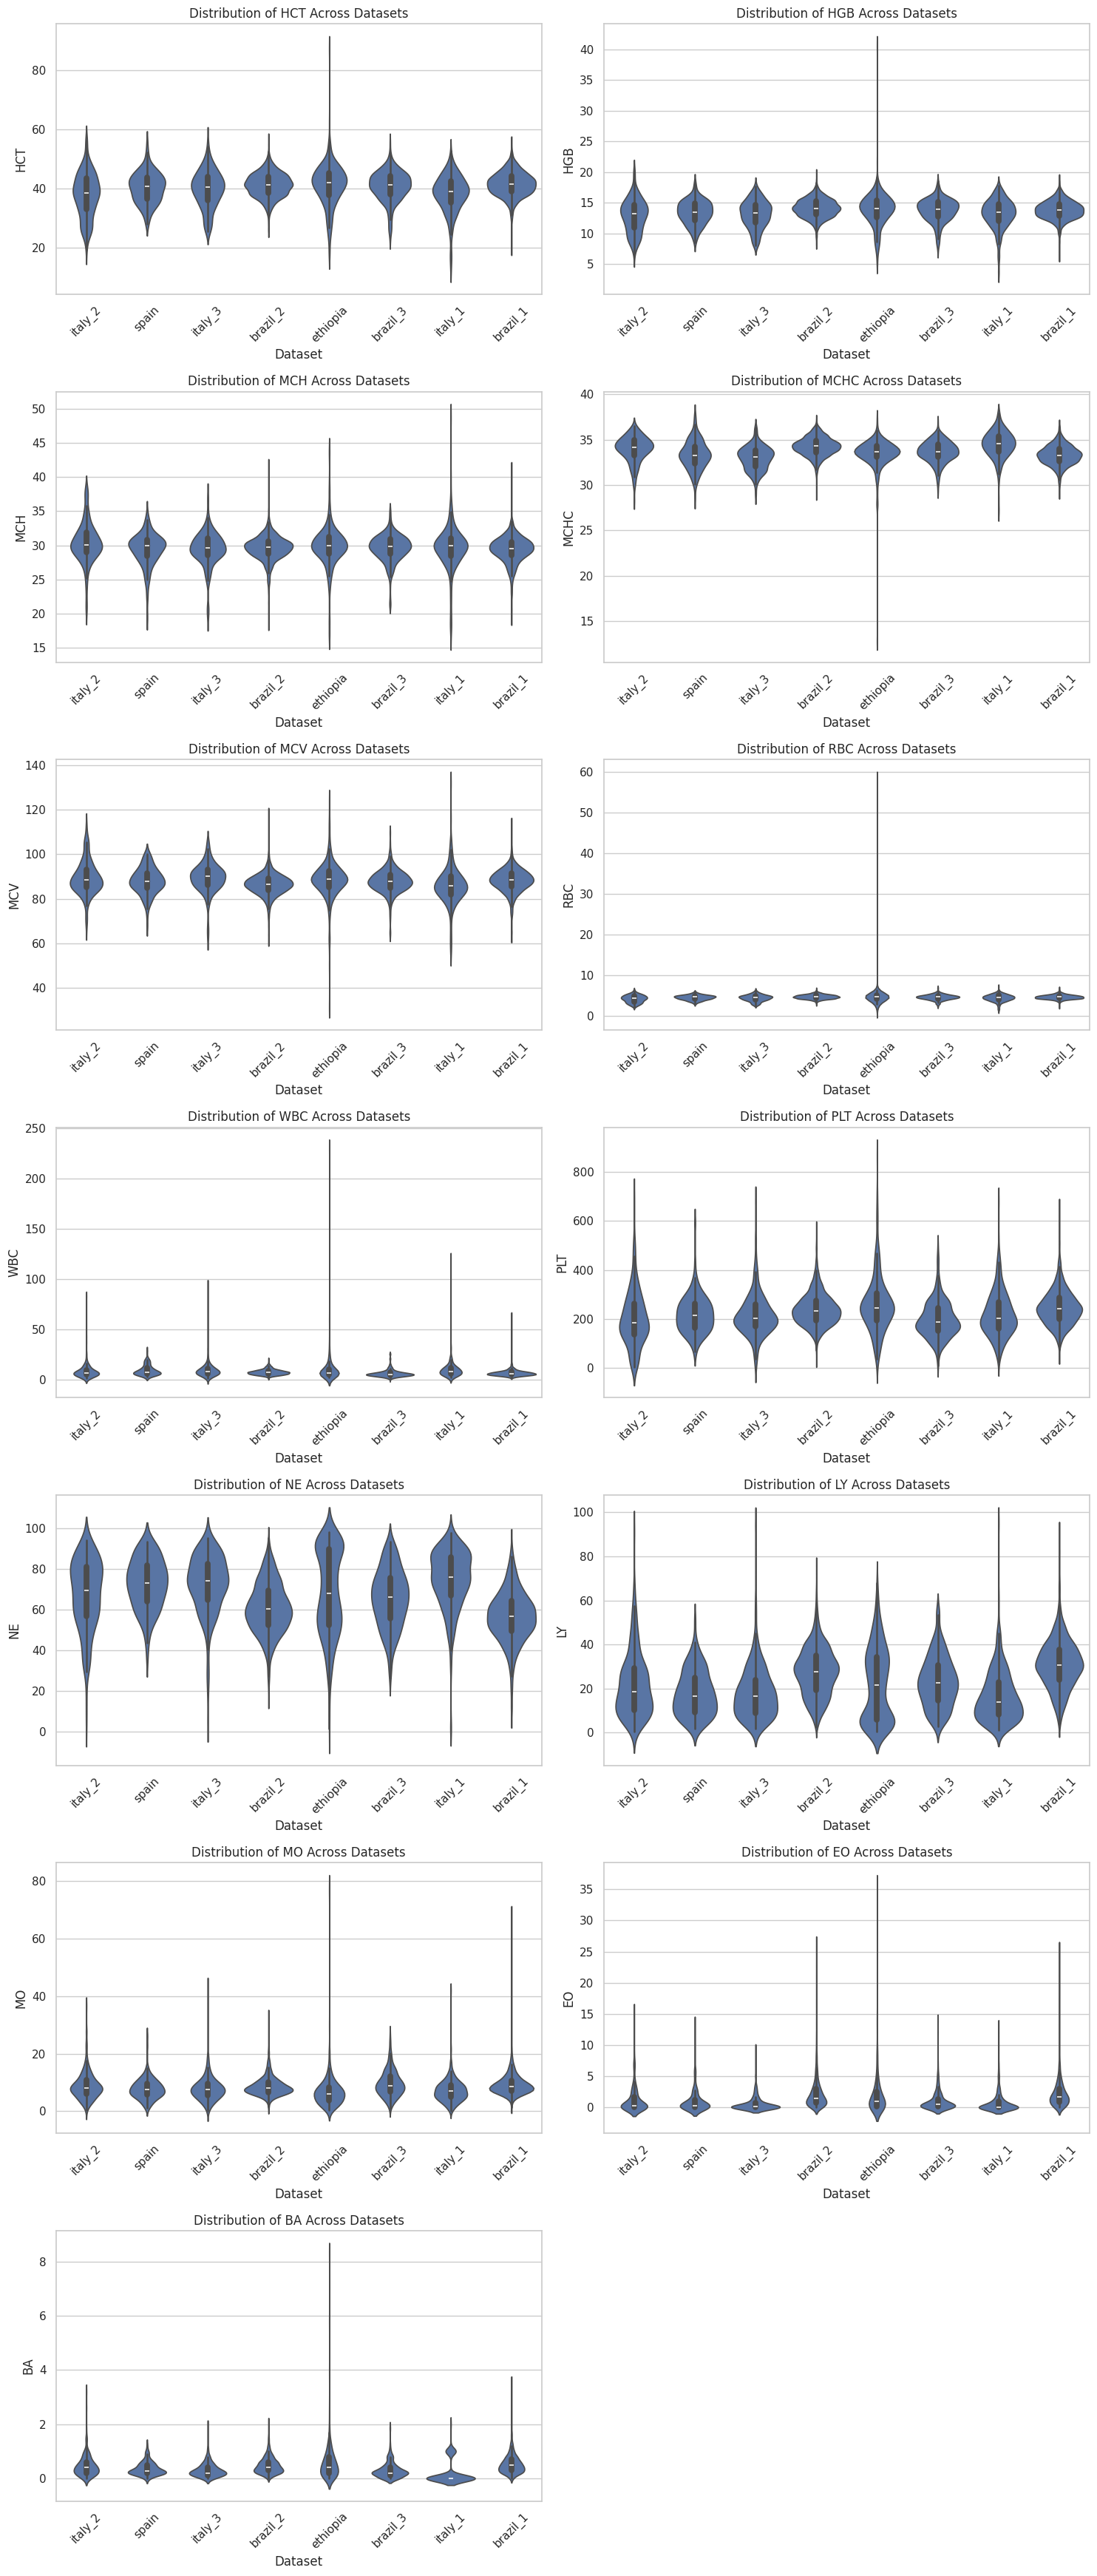

In [7]:
# Create a list to store all dataframes with dataset name
all_dfs = []
for dataset_name, df in data.items():
    df['dataset'] = dataset_name  # Add dataset name as a column
    all_dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(all_dfs, ignore_index=True)

# Get numerical columns (excluding 'target' and 'dataset')
numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['target', 'dataset']]

# Create violin plots for each numerical feature
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate required number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()  # Flatten axes array for easier iteration

for idx, feature in enumerate(numerical_cols):
    sns.violinplot(data=combined_df, x='dataset', y=feature, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature} Across Datasets')
    axes[idx].set_xlabel('Dataset')
    axes[idx].set_ylabel(feature)
    axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplots if any
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
from scipy.stats import kruskal

for column_name in data["brazil_1"].columns:
    # Extract the specified column from each dataframe
    samples = [df[column_name].values for df in data.values()]
    
    # Perform Kruskal-Wallis H-test
    statistic, p_value = kruskal(*samples)
    
    print(f"Column: {column_name}, p-value: {p_value}, statistic: {statistic}")

Column: HCT, p-value: 1.3132650721562366e-28, statistic: 147.5715985189843
Column: HGB, p-value: 1.5859930938200468e-26, statistic: 137.6404473669943
Column: MCH, p-value: 3.384478051720623e-08, statistic: 48.11269223360514
Column: MCHC, p-value: 5.023429144869418e-174, statistic: 825.7975687793247
Column: MCV, p-value: 8.874203159480453e-54, statistic: 266.4079588443806
Column: RBC, p-value: 8.031711362037316e-27, statistic: 139.05149932787697
Column: WBC, p-value: 3.611019466426483e-62, statistic: 305.7311799378482
Column: PLT, p-value: 4.053371885240347e-49, statistic: 244.5241041439938
Column: NE, p-value: 3.95369673587288e-153, statistic: 728.9457778098136
Column: LY, p-value: 3.113436860680501e-148, statistic: 706.2399949799417
Column: MO, p-value: 2.2481856347375264e-68, statistic: 334.76063706070784
Column: EO, p-value: 7.187879096359218e-182, statistic: 862.1371761726666
Column: BA, p-value: 1.0827115947606586e-129, statistic: 620.2067344508771
Column: target, p-value: 9.33150

In [9]:
names, dataframes = zip(*data.items())
names

('italy_2',
 'spain',
 'italy_3',
 'brazil_2',
 'ethiopia',
 'brazil_3',
 'italy_1',
 'brazil_1')

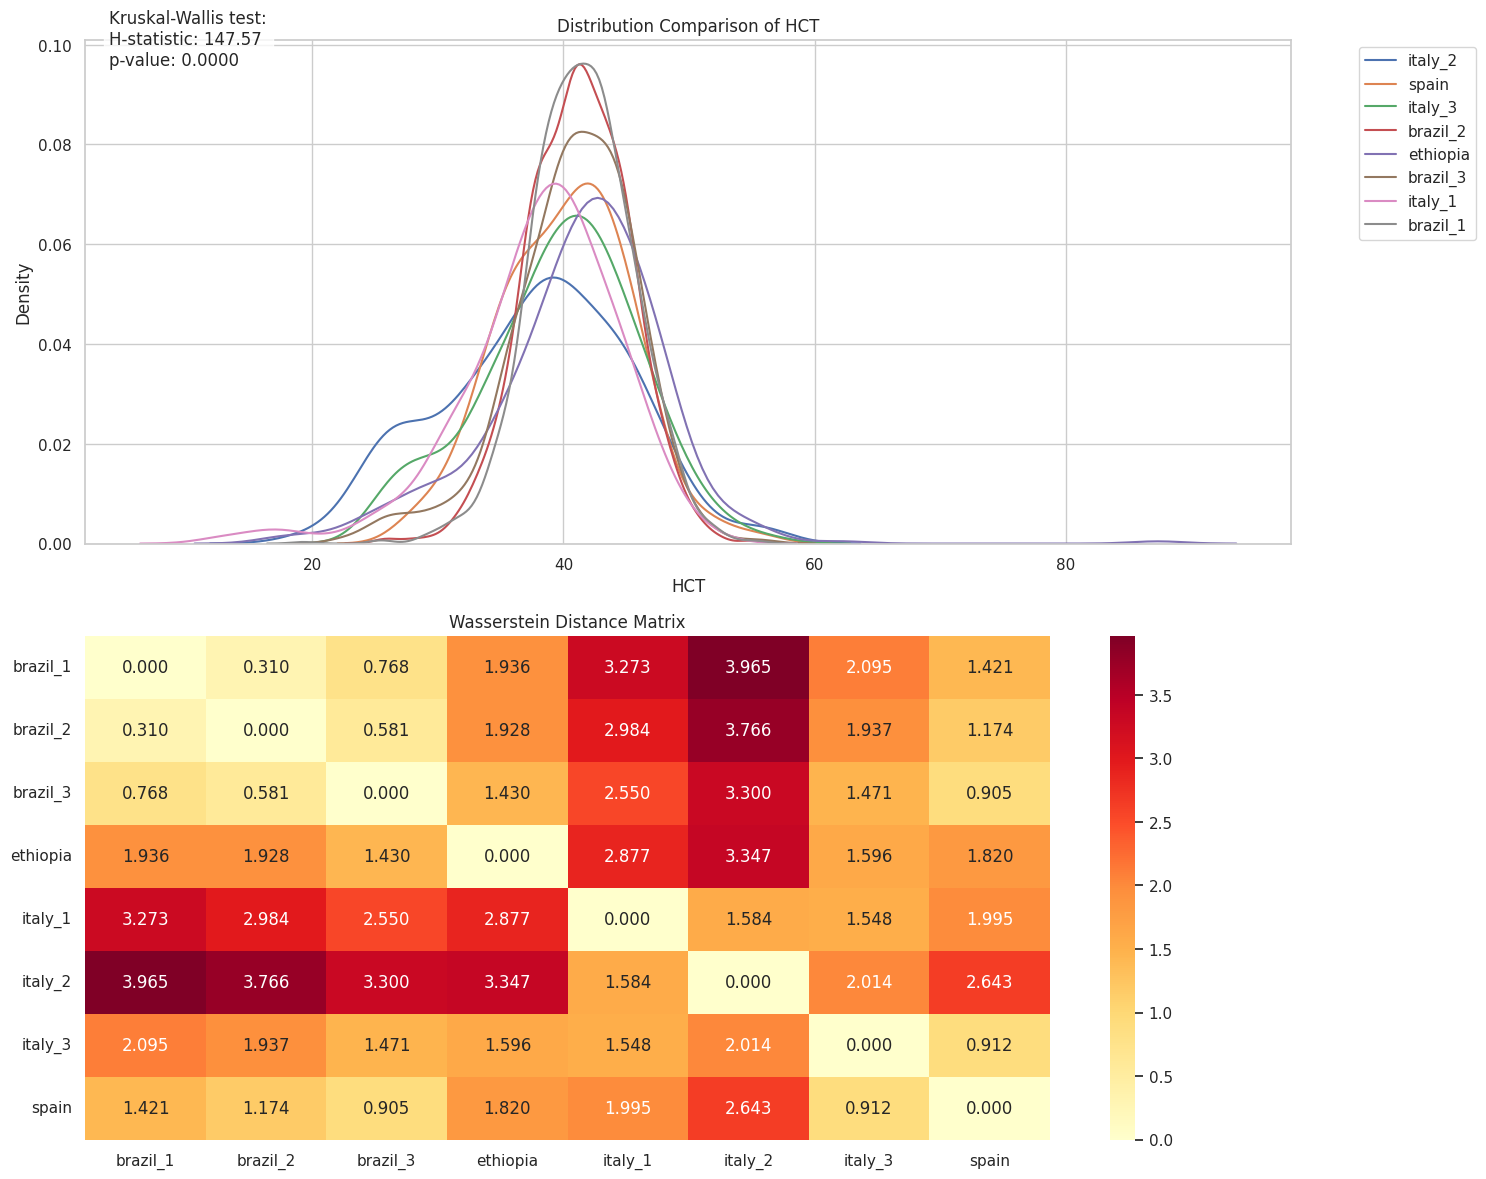

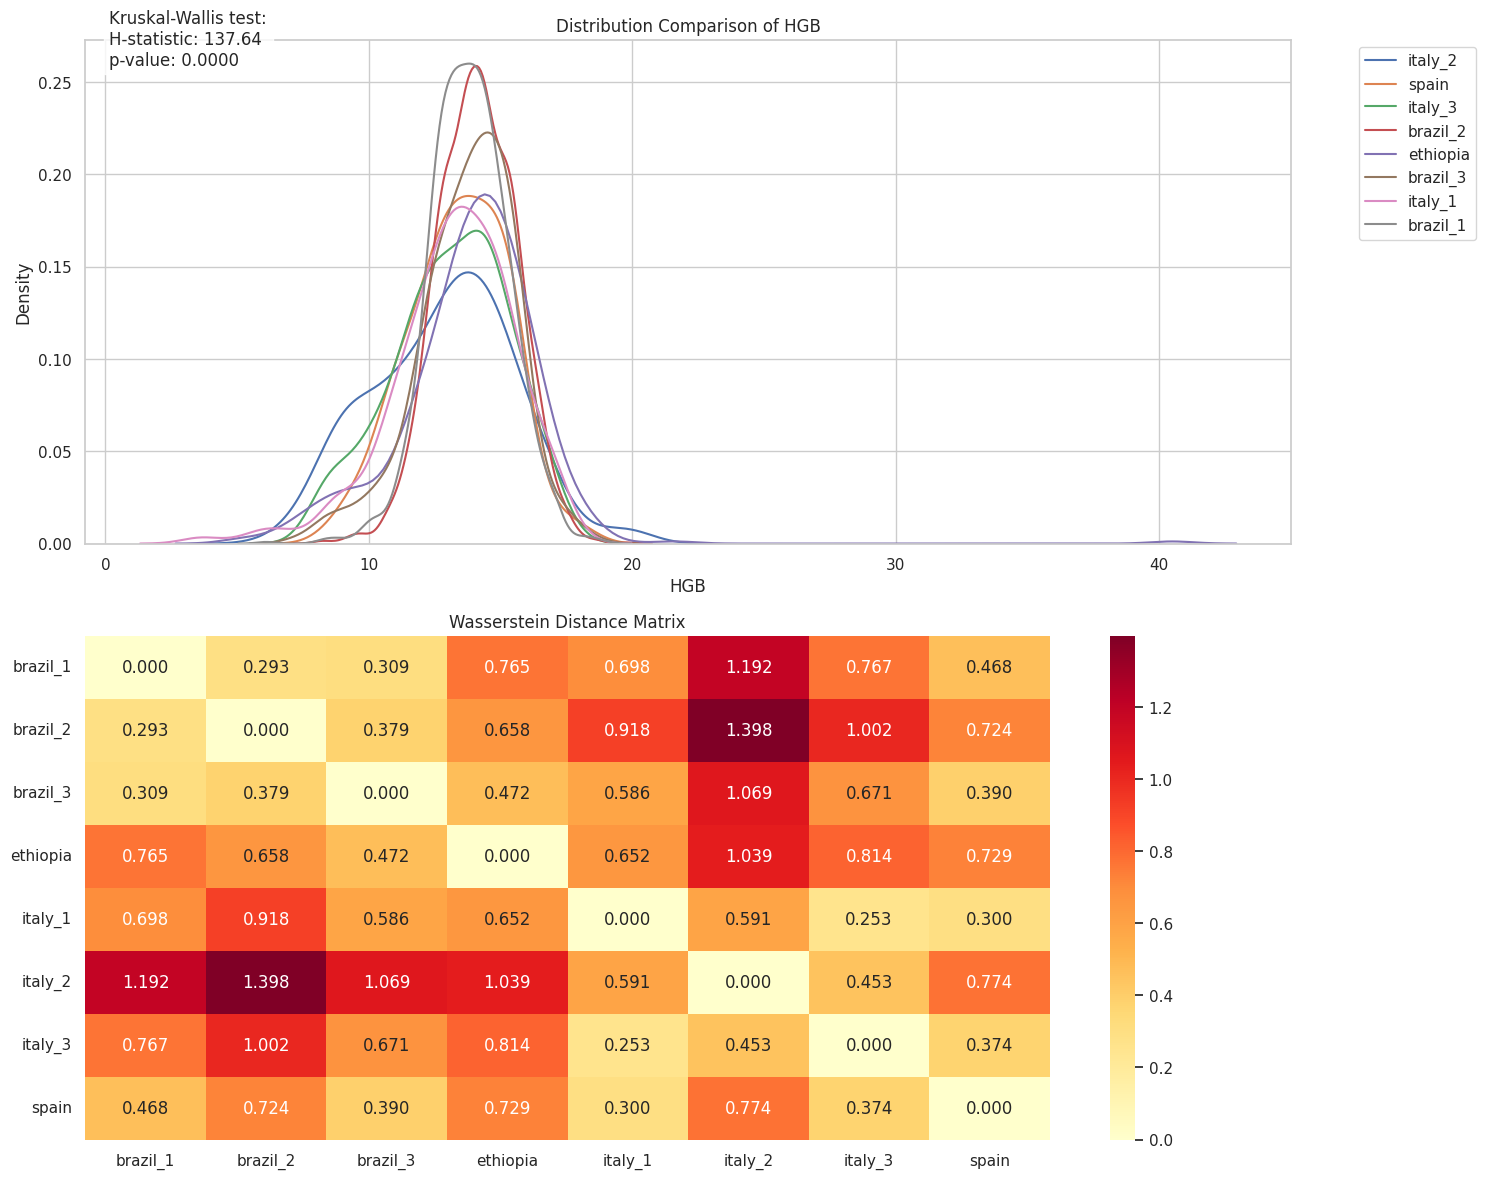

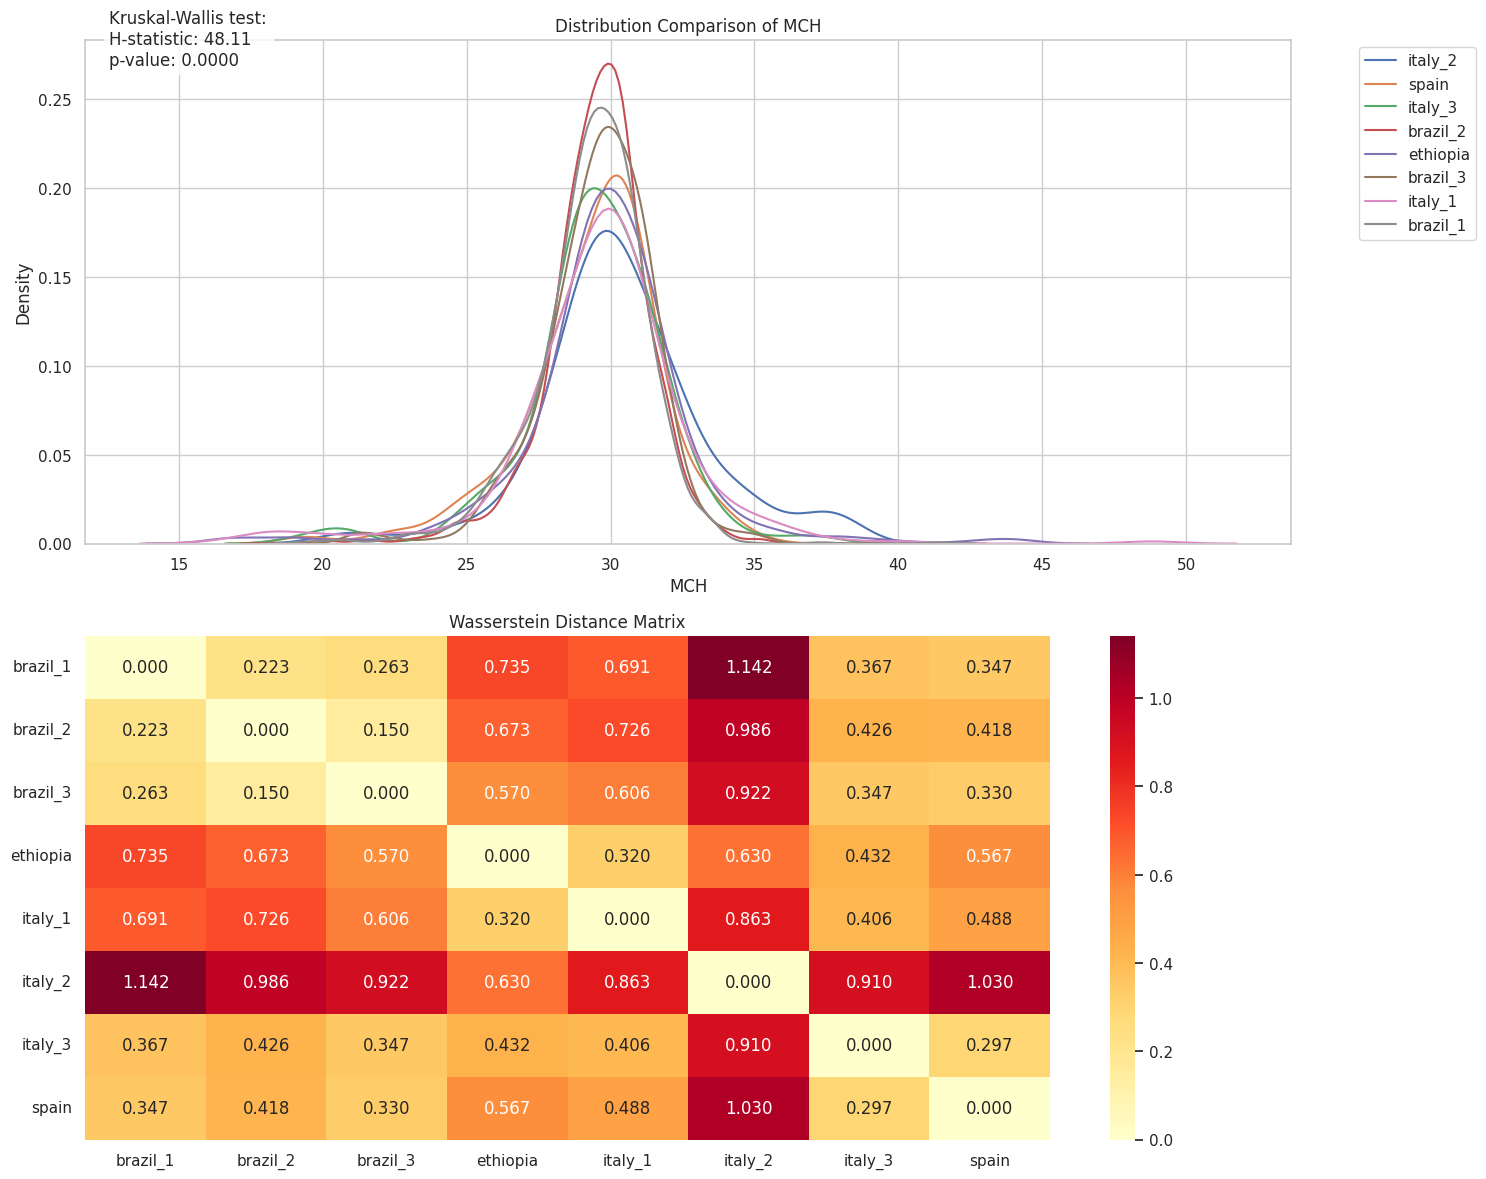

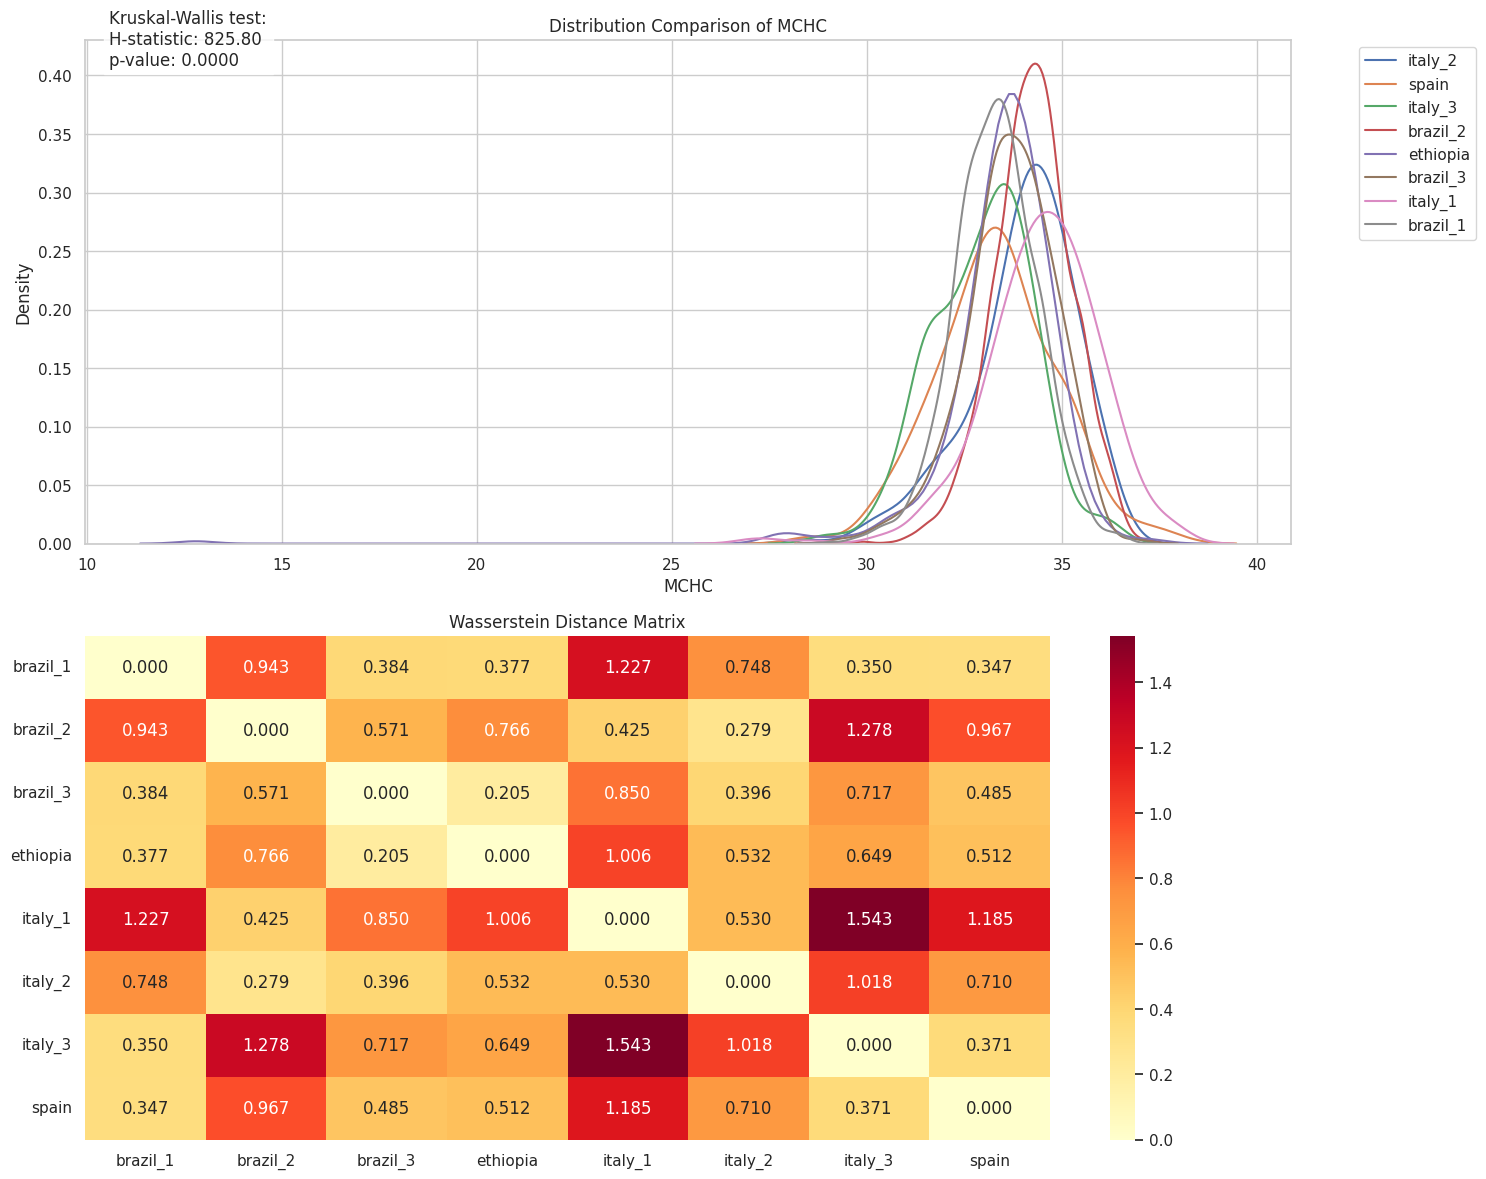

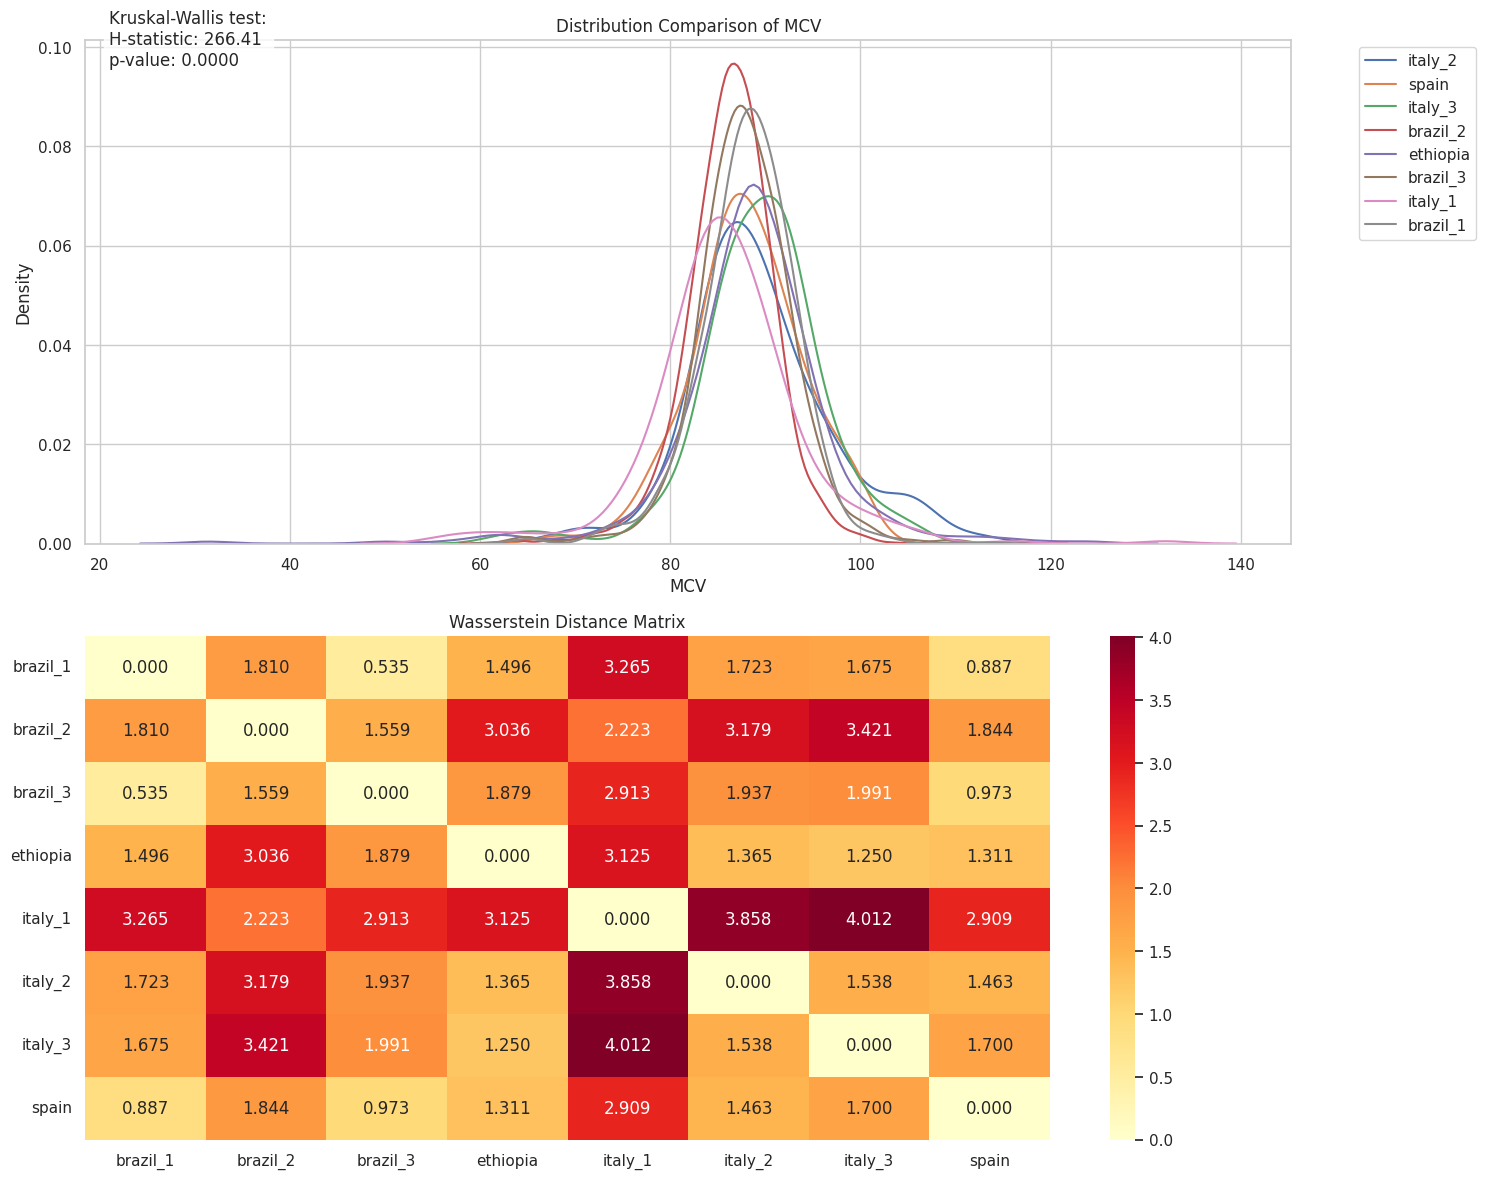

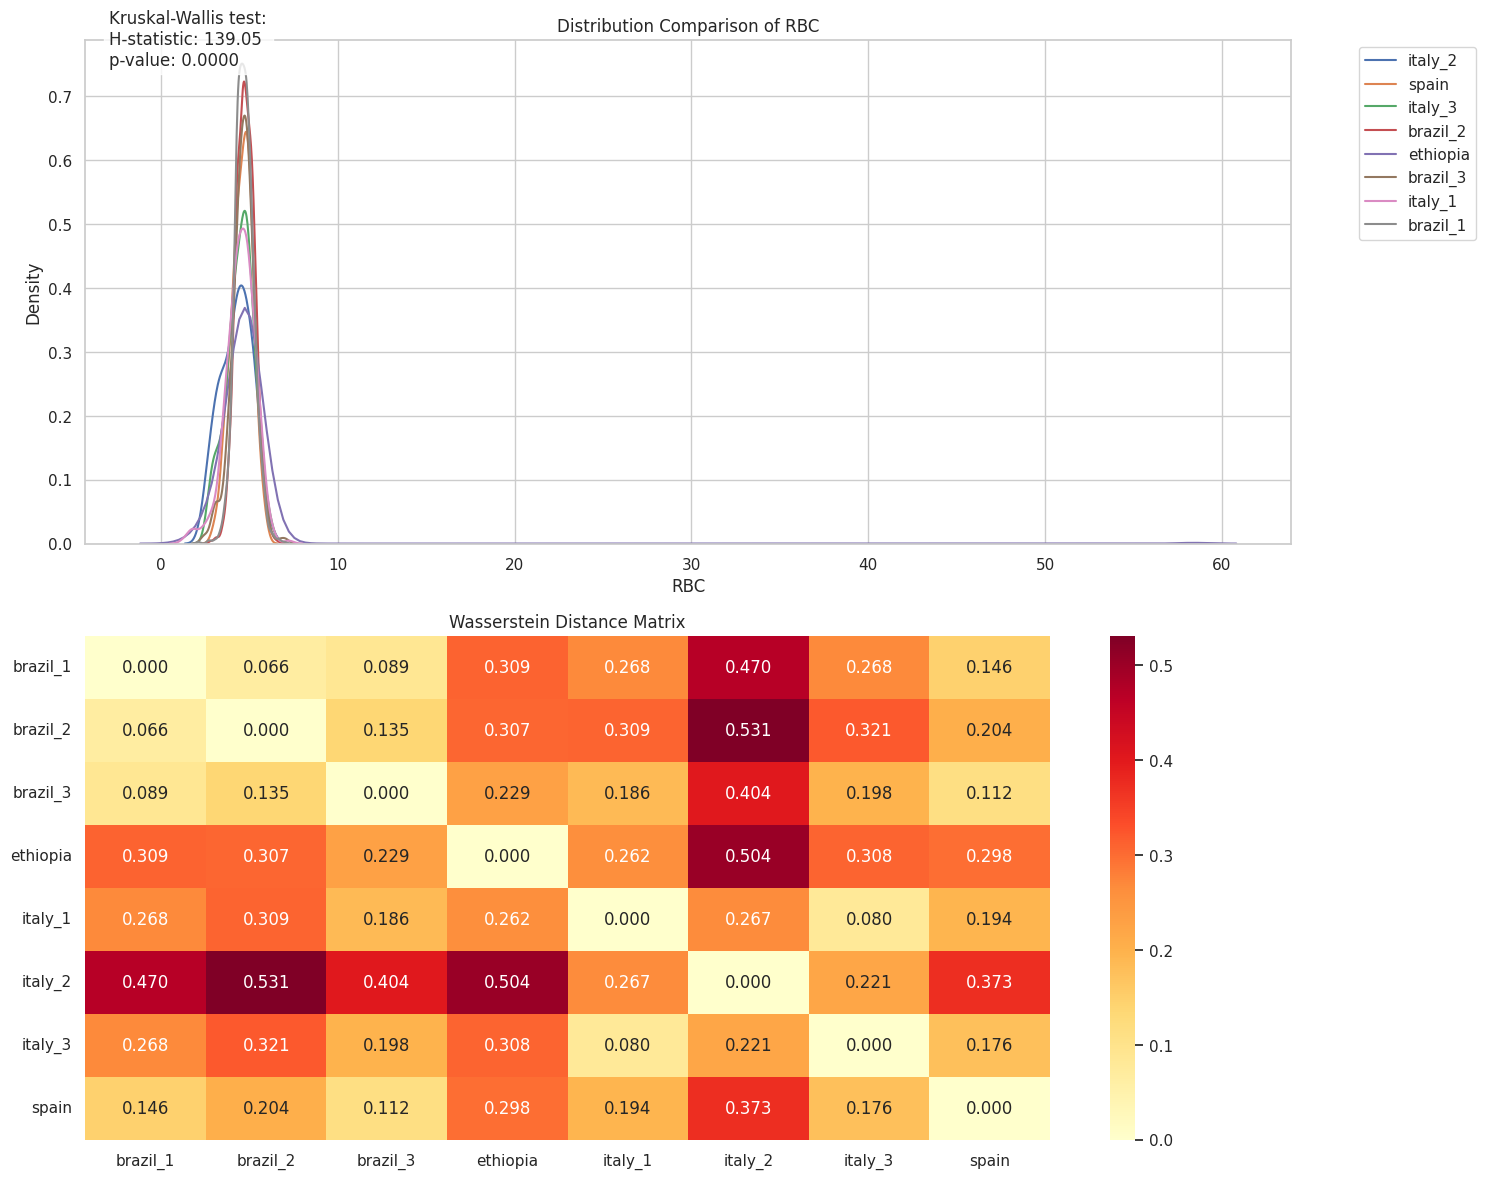

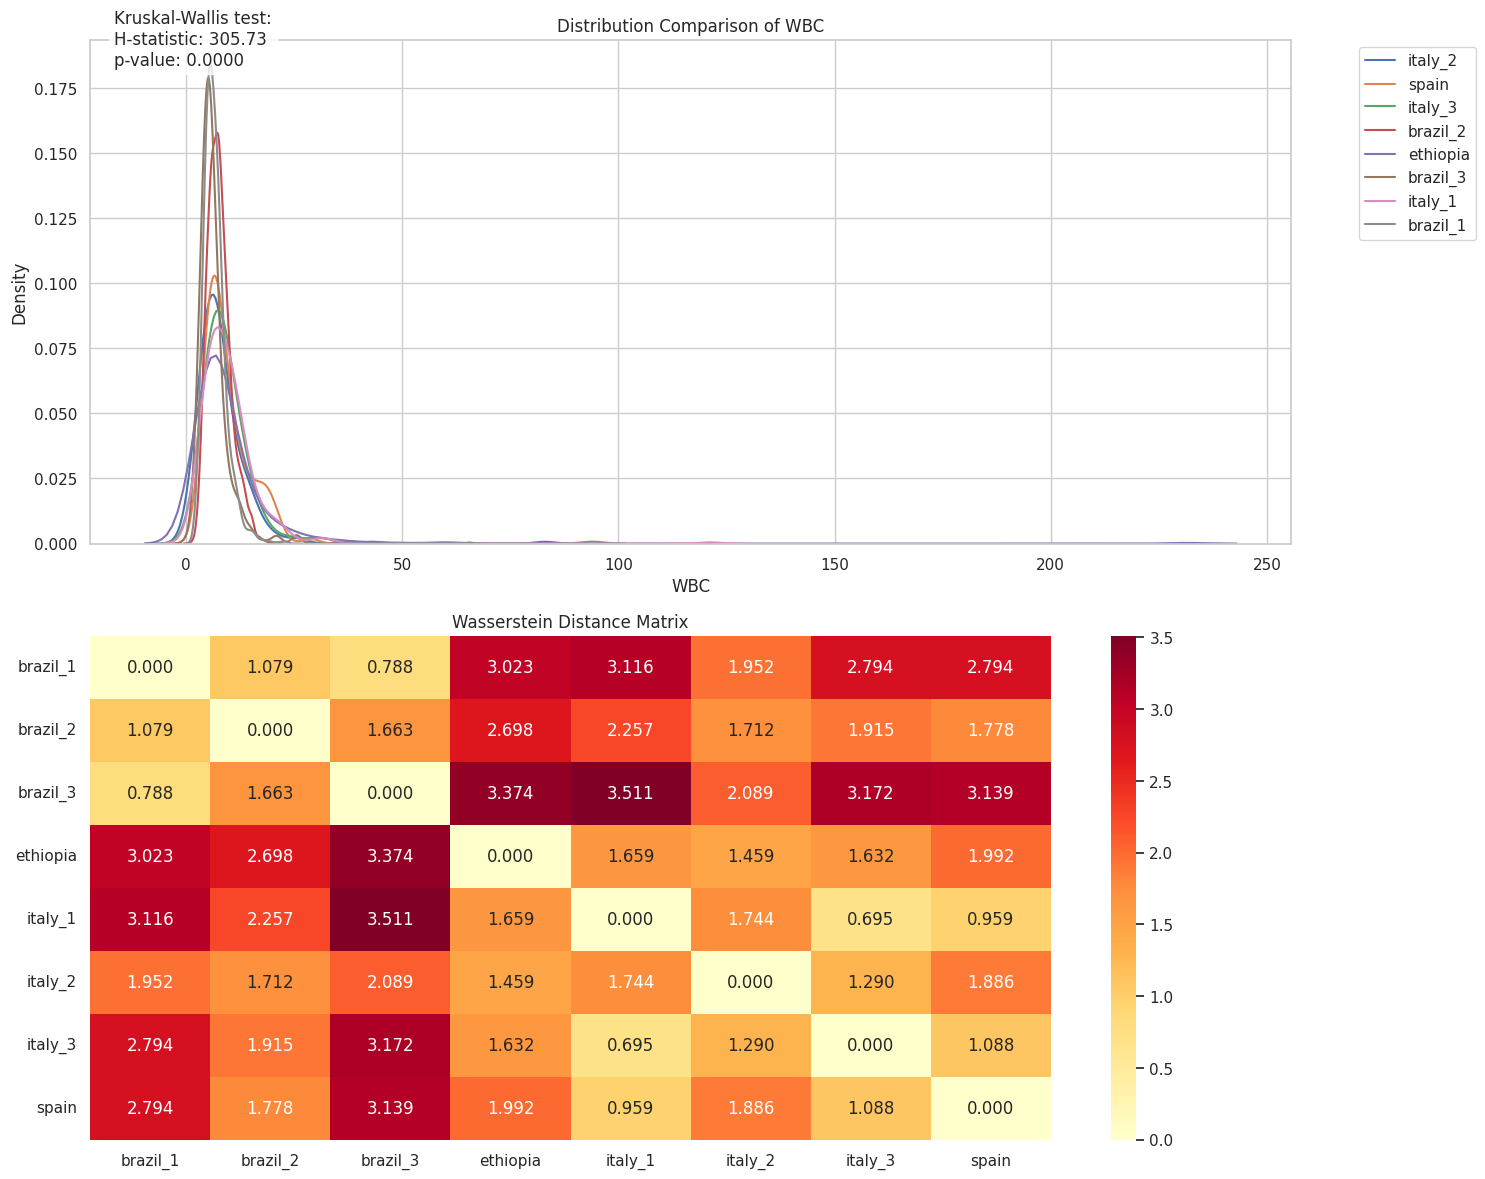

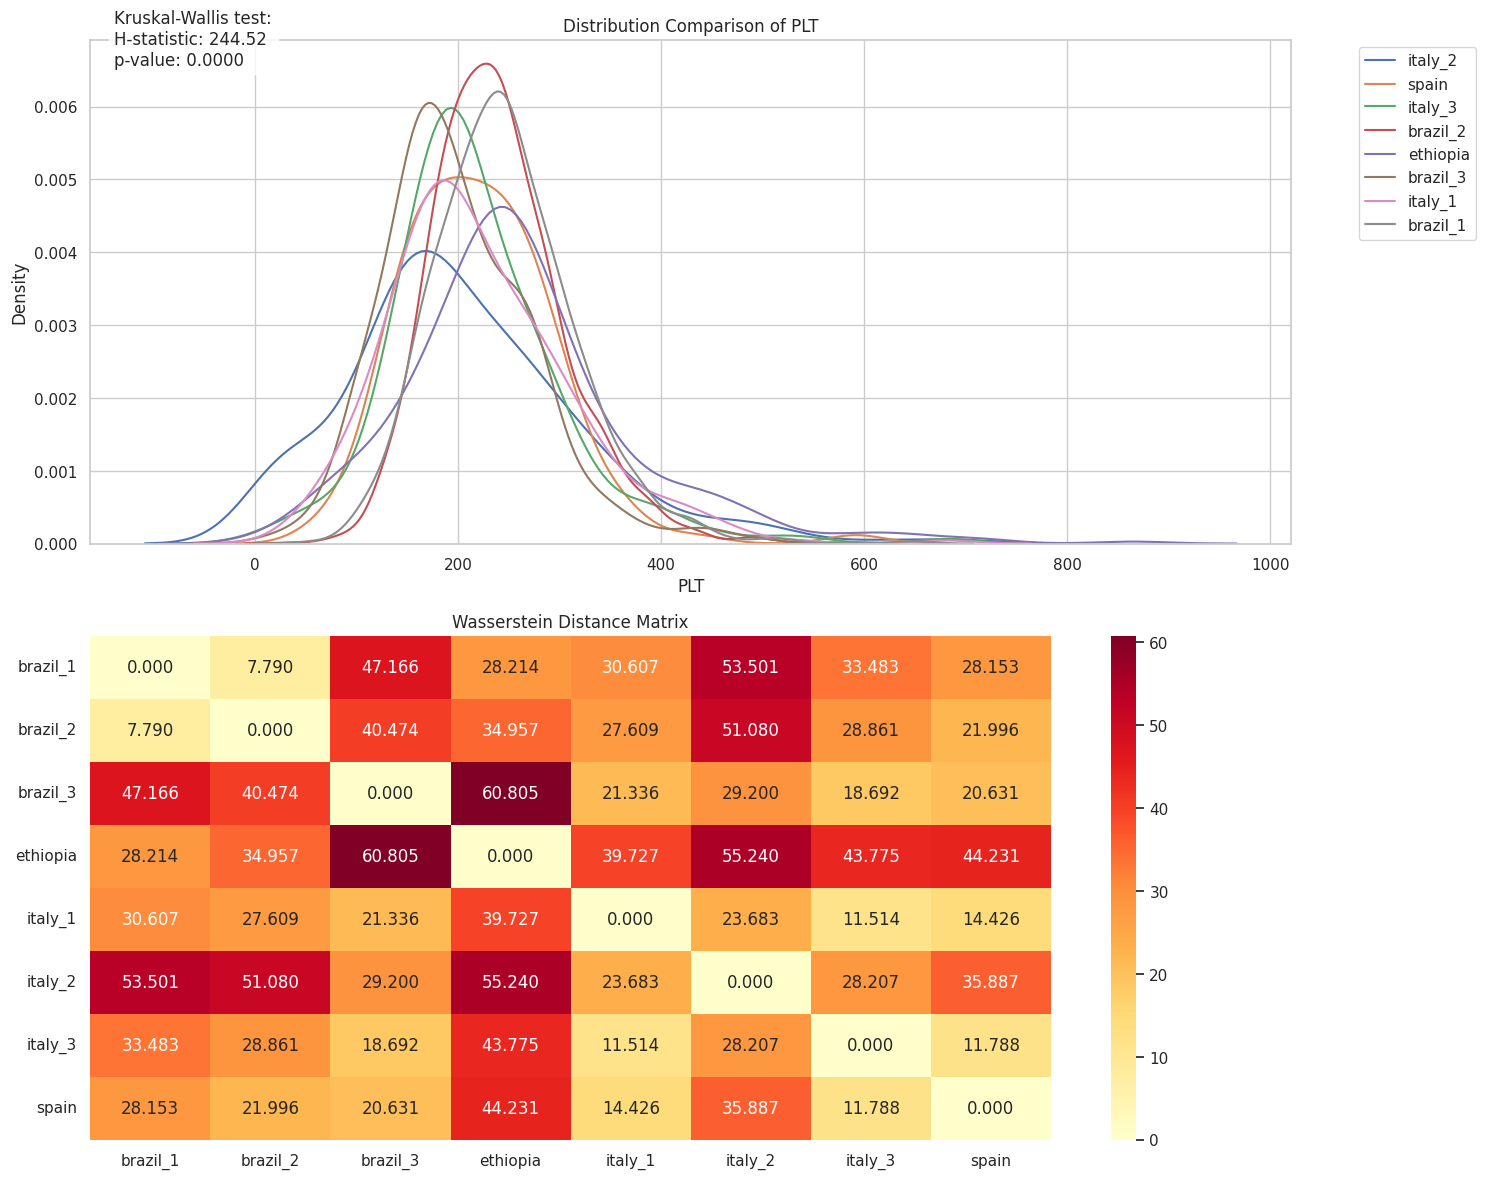

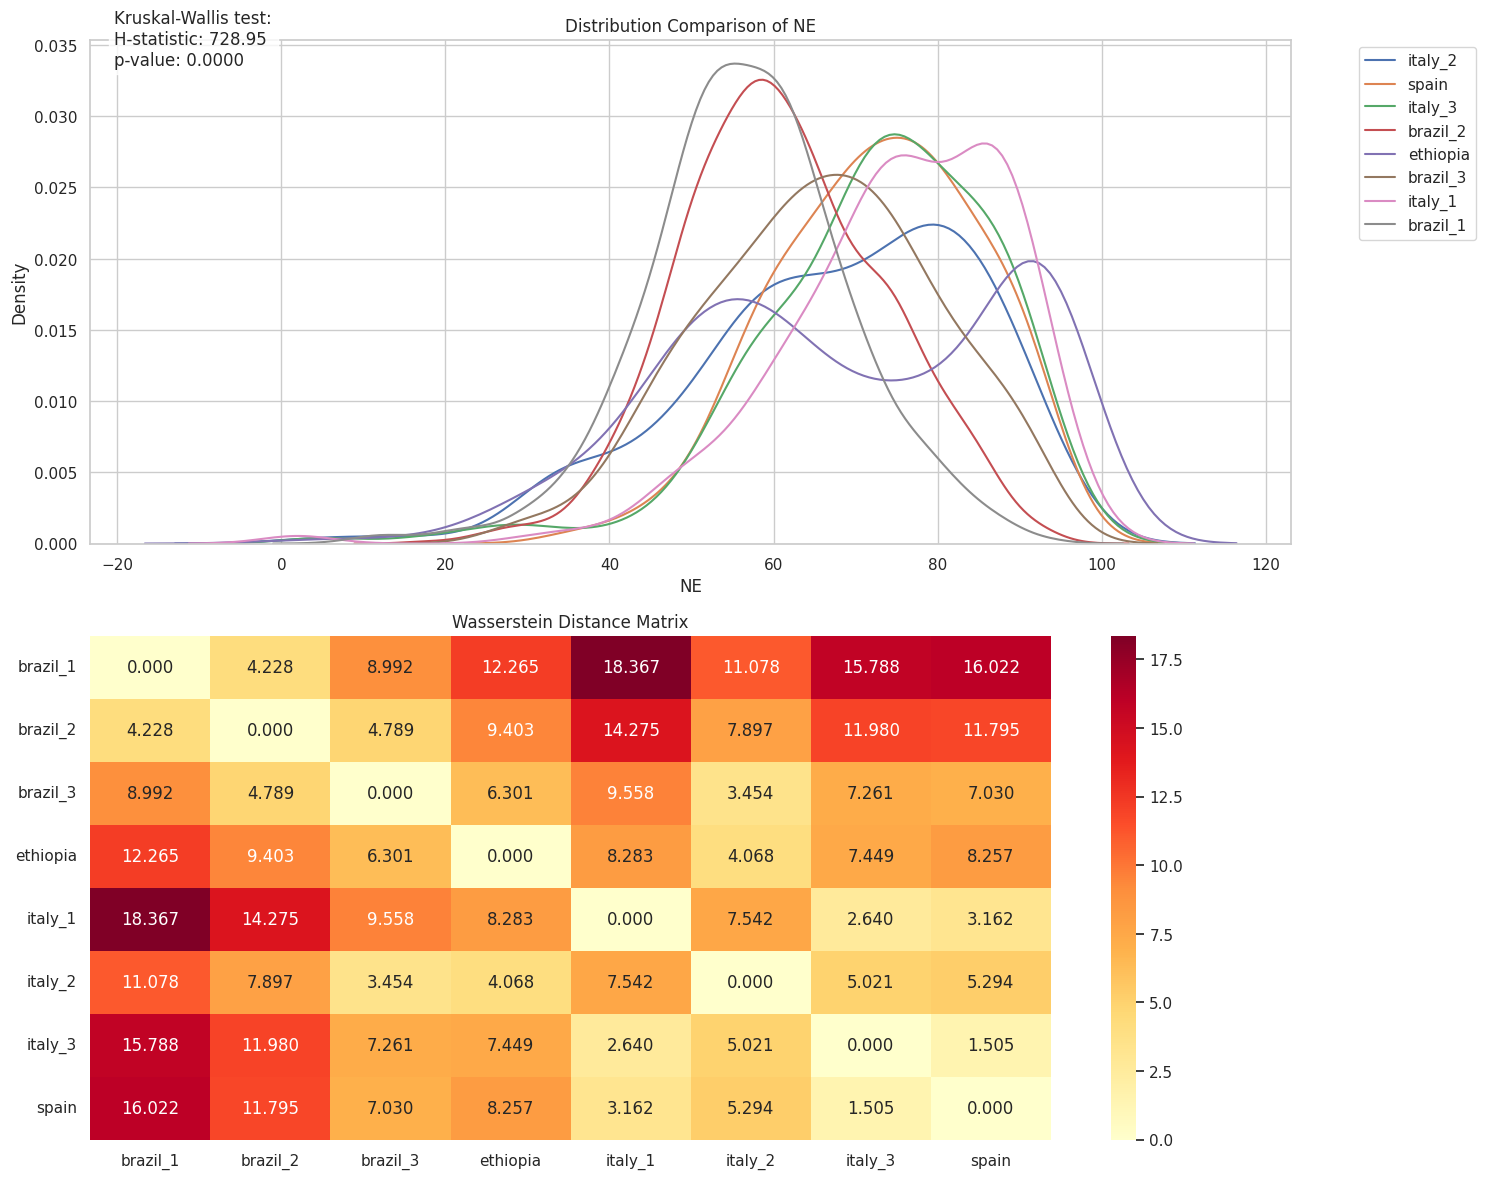

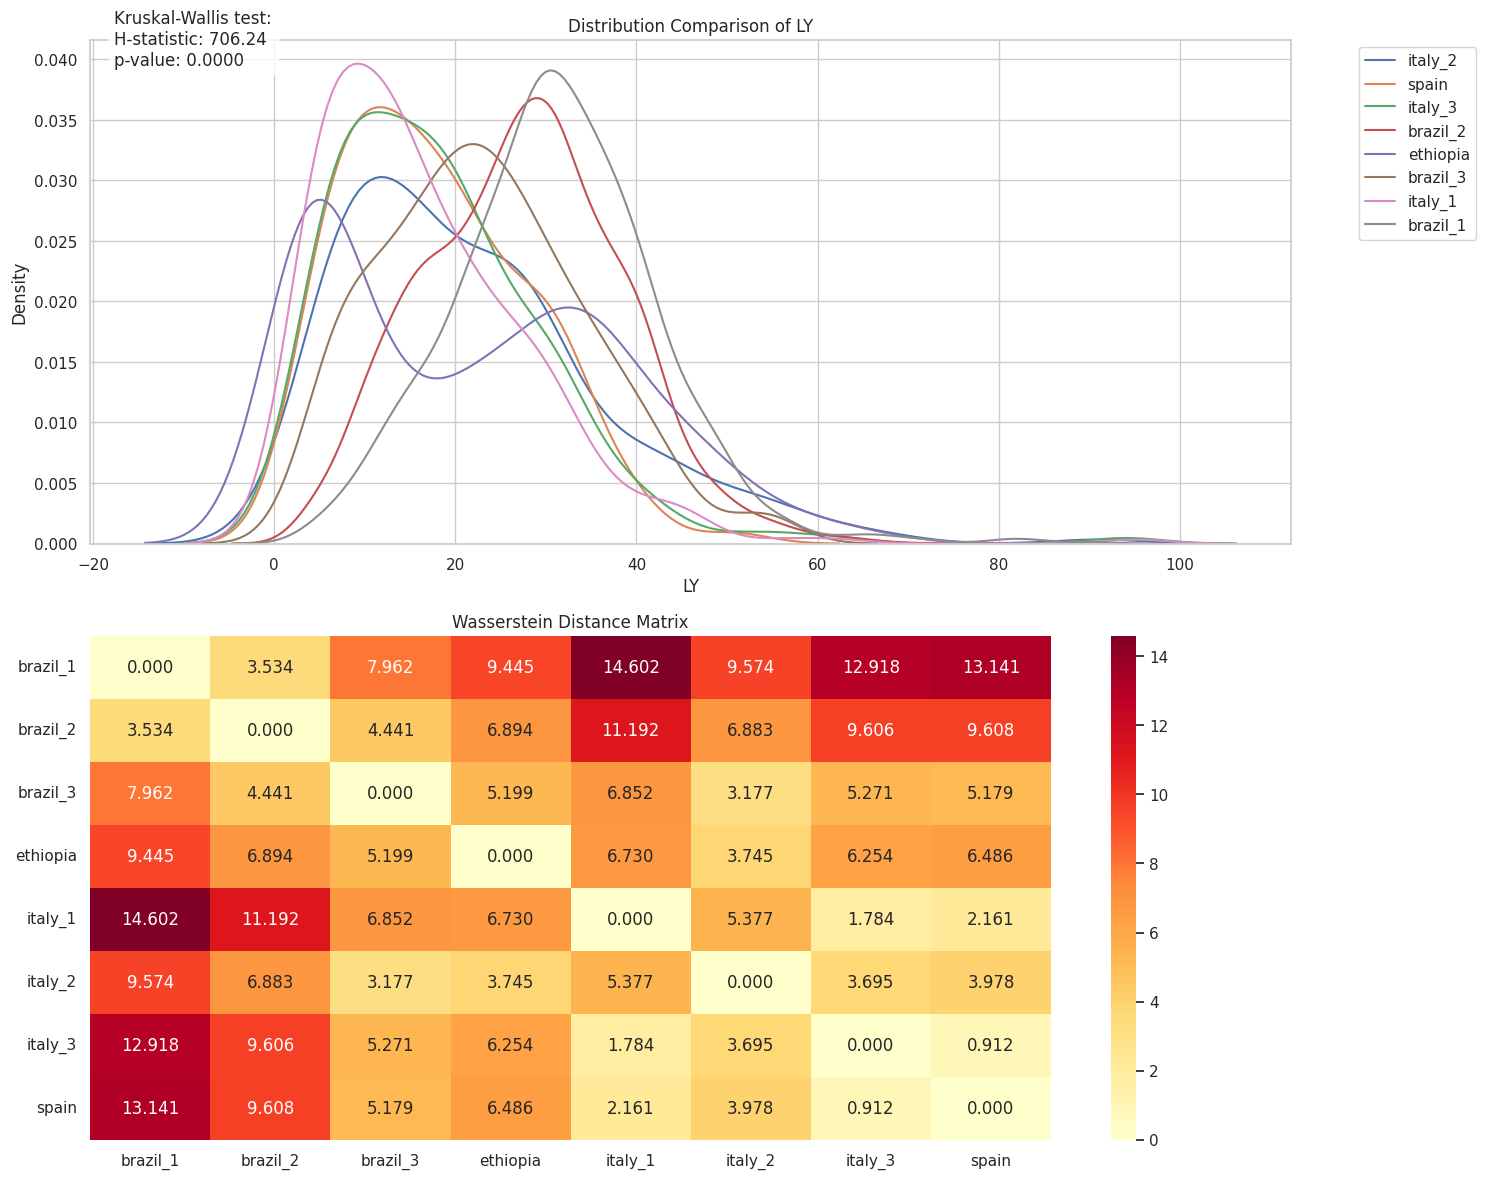

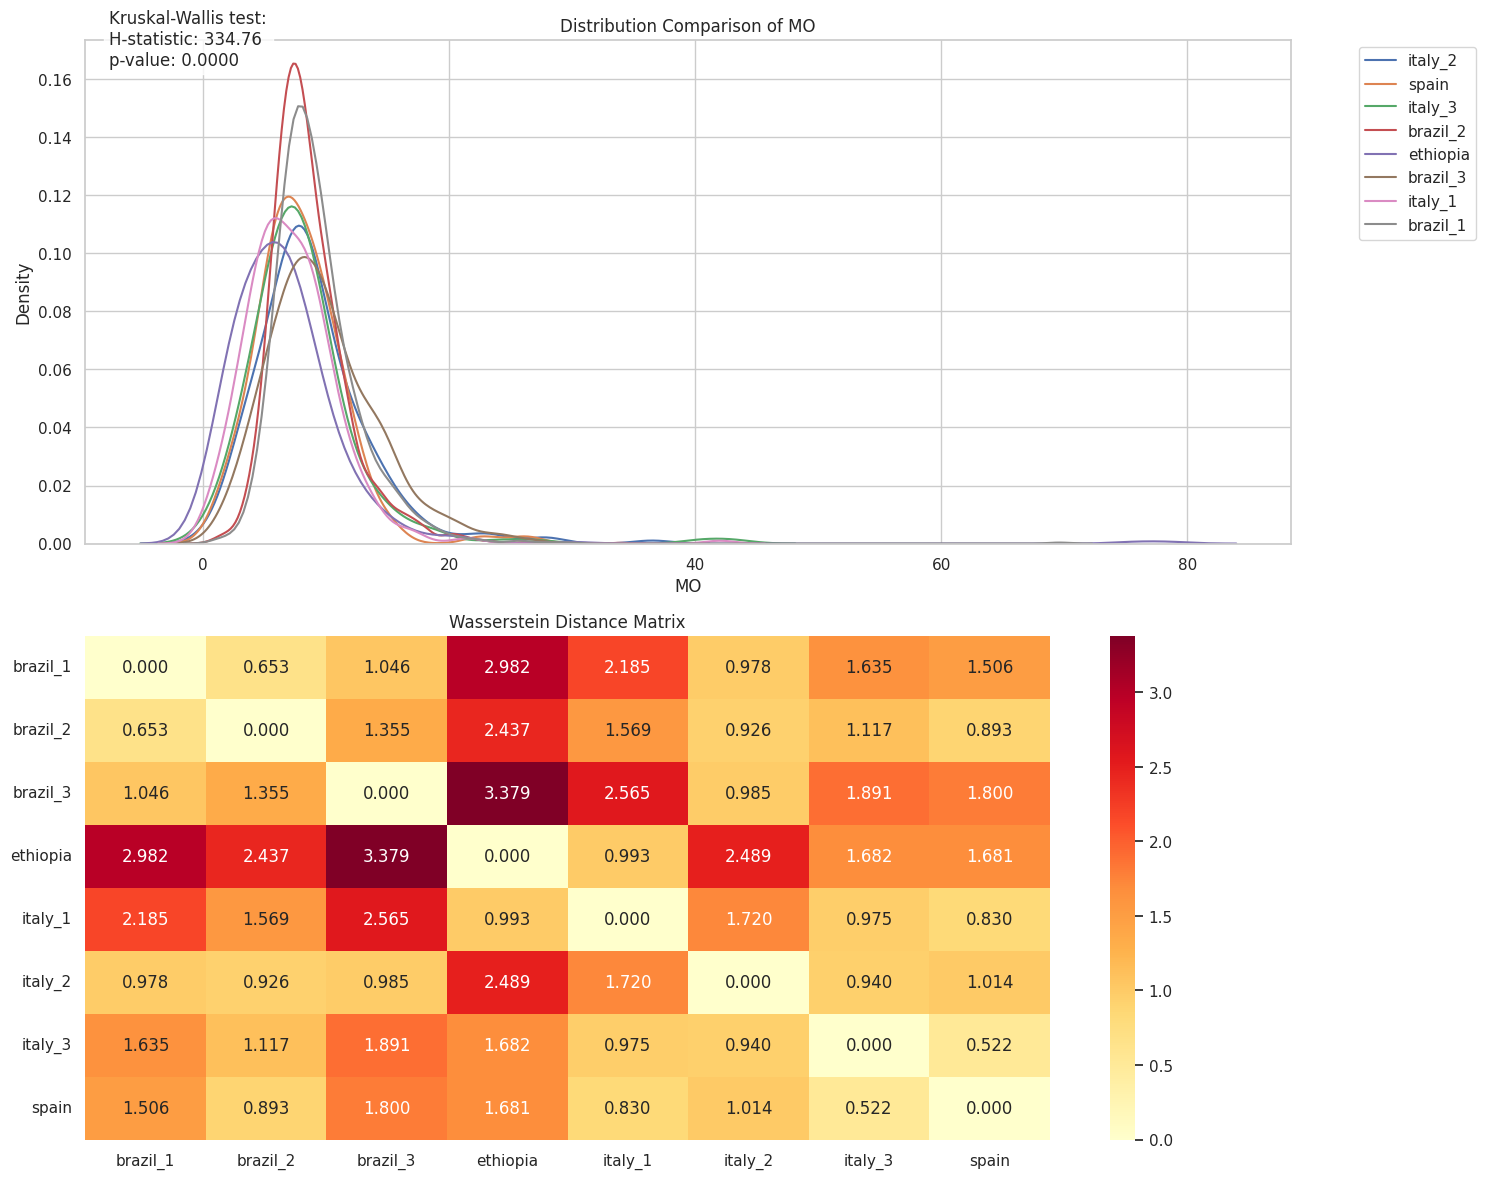

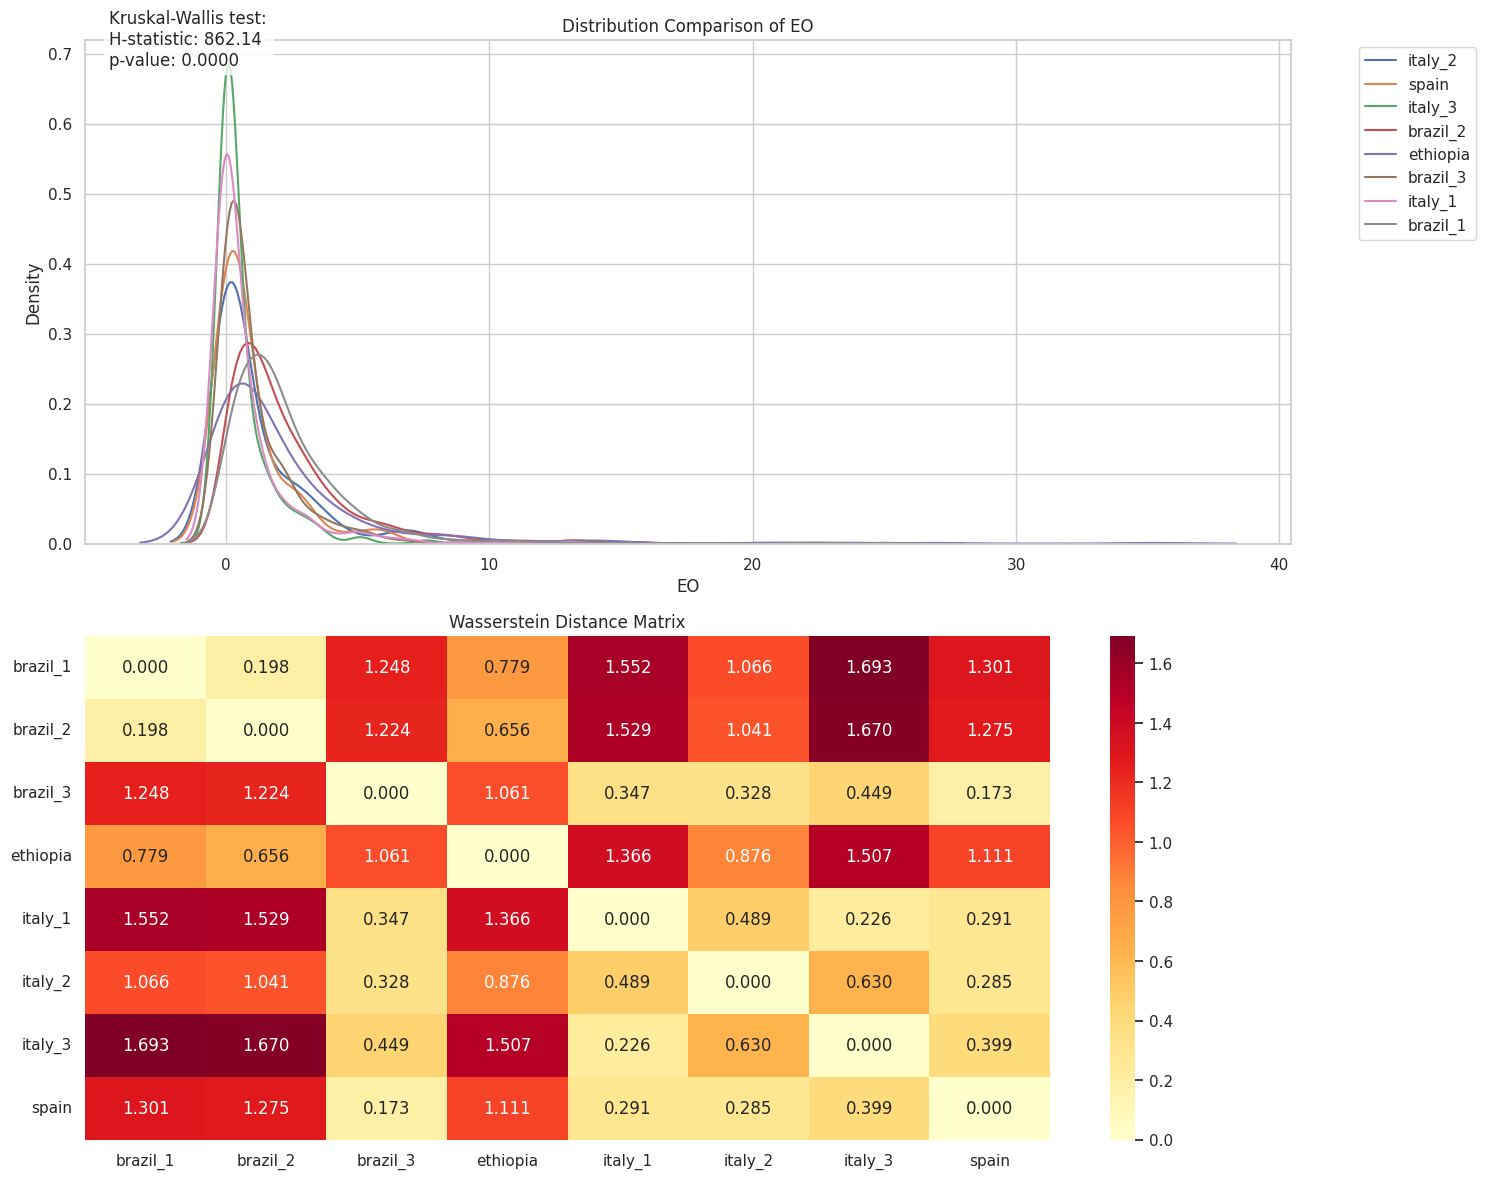

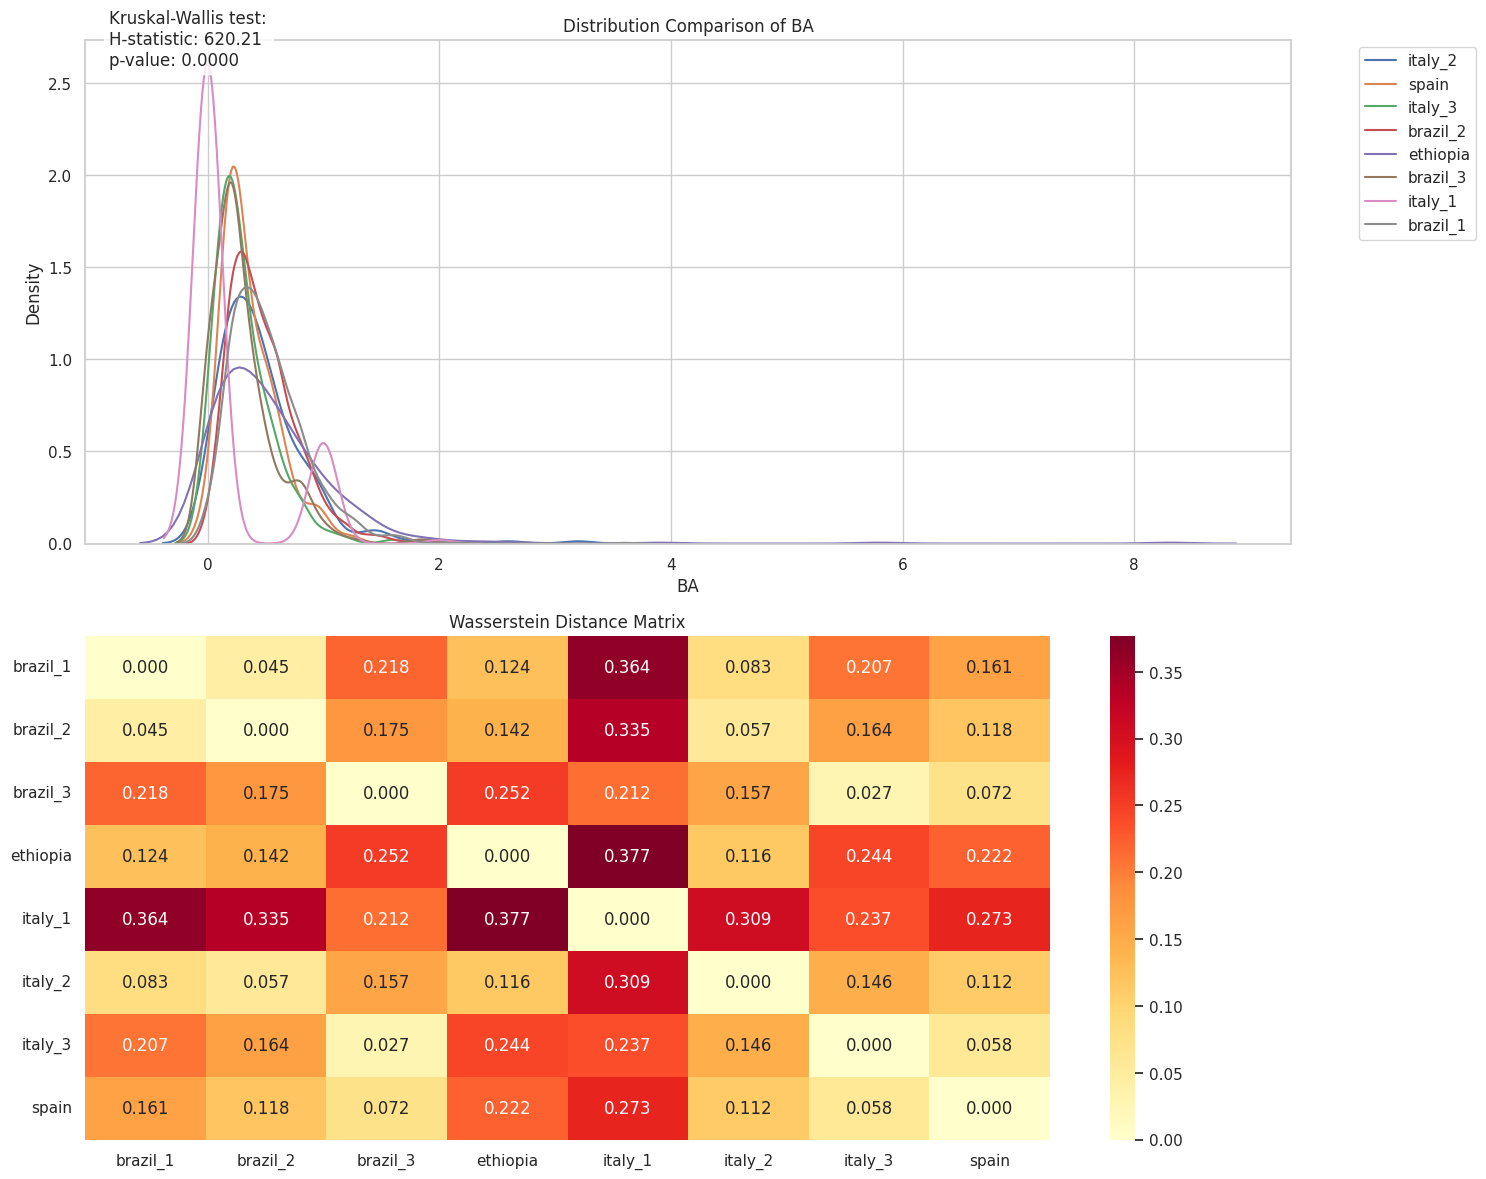

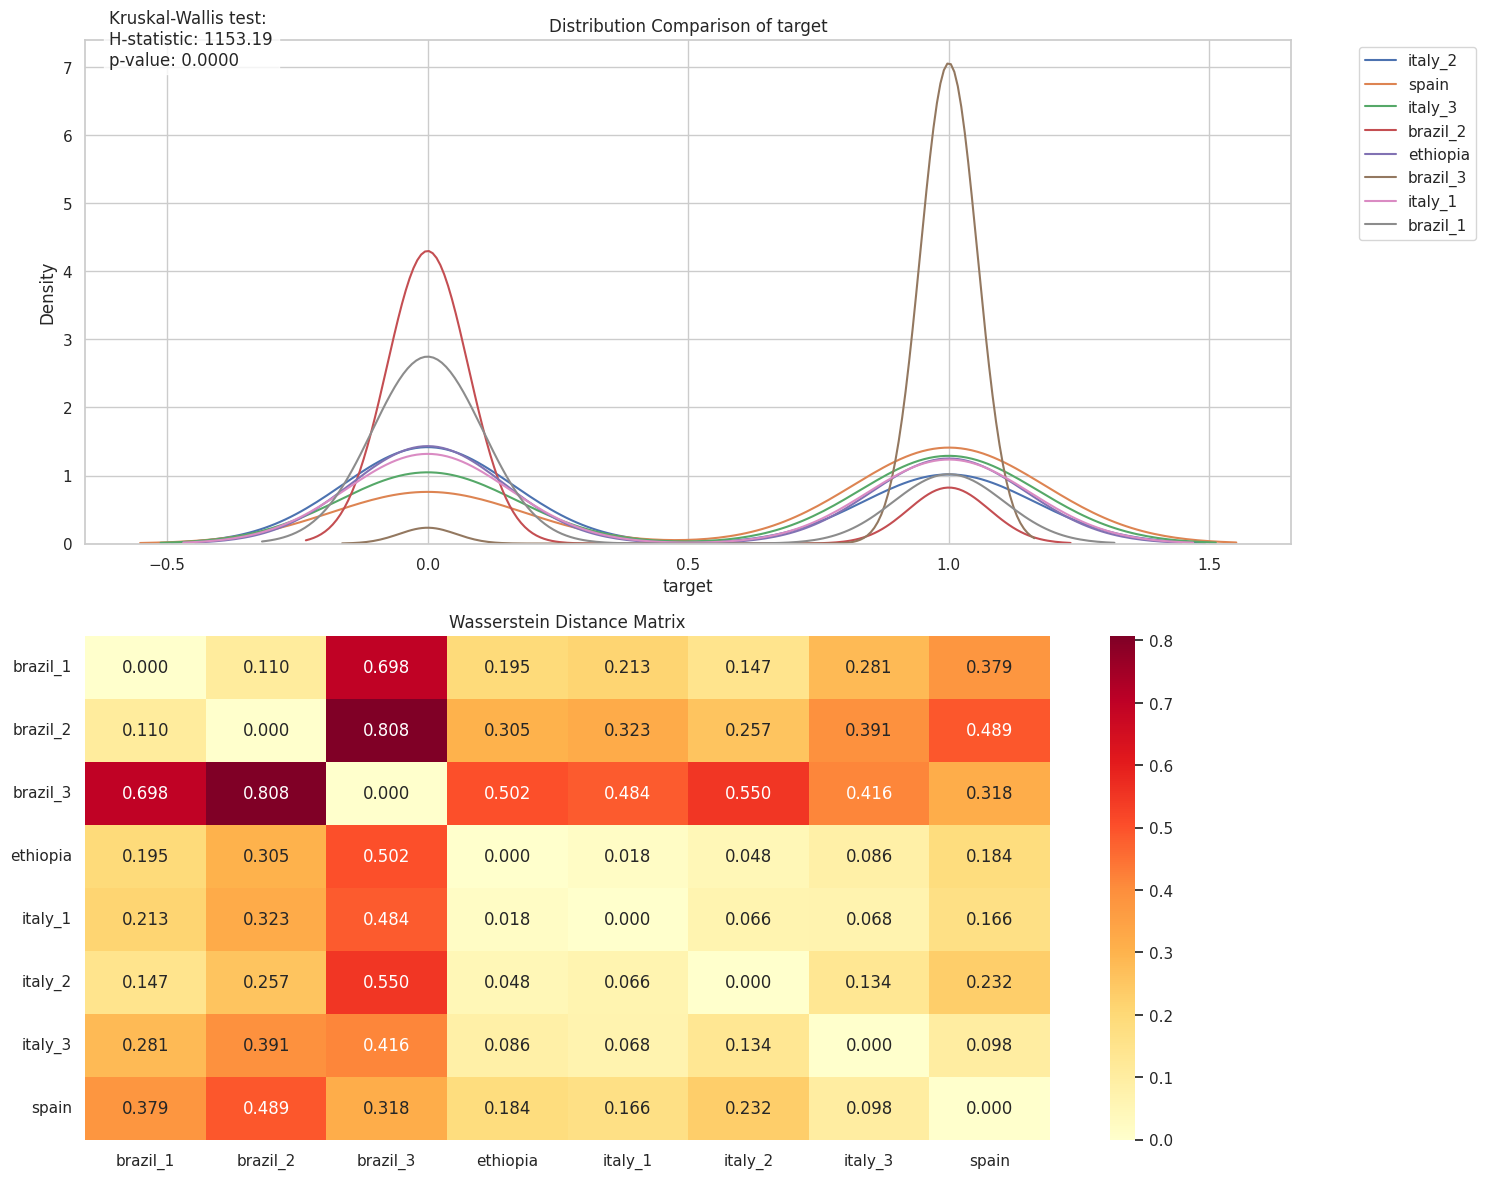

In [10]:
from scipy.stats import wasserstein_distance

def plot_distribution_comparison(data, column_name):
    """
    Create visualizations comparing distributions across dataframes.
    
    Args:
        data: Dictionary of dataframes where keys are dataset names
        column_name: Name of the column to compare across dataframes
    """
    # Get dataframes and names from dictionary
    df_names = sorted(list(data.keys()))
    dataframes = [data[name] for name in df_names]
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # 1. Distribution Plot
    plt.subplot(2, 1, 1)
    for name, df in data.items():
        sns.kdeplot(data=df[column_name], label=name)
    
    plt.title(f'Distribution Comparison of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Calculate and add Kruskal-Wallis test results
    samples = [df[column_name].values for df in dataframes]
    statistic, p_value = kruskal(*samples)
    plt.text(0.02, 0.95, f'Kruskal-Wallis test:\nH-statistic: {statistic:.2f}\np-value: {p_value:.4f}',
             transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    # 2. Wasserstein Distance Heatmap
    n = len(dataframes)
    distance_matrix = np.zeros((n, n))
    
    for i, name1 in enumerate(df_names):
        for j, name2 in enumerate(df_names):
            distance_matrix[i, j] = wasserstein_distance(
                data[name1][column_name].values,
                data[name2][column_name].values
            )
    
    plt.subplot(2, 1, 2)
    sns.heatmap(distance_matrix, 
                annot=True, 
                fmt='.3f', 
                cmap='YlOrRd',
                xticklabels=df_names,
                yticklabels=df_names)
    plt.title('Wasserstein Distance Matrix')
    
    plt.tight_layout()
    plt.show()
    
    return distance_matrix


for column_name in data["brazil_1"].columns:
    if column_name == "dataset":
        continue
    distances = plot_distribution_comparison(data, column_name=column_name)


In [11]:
data

{'italy_2':       HCT   HGB   MCH  MCHC   MCV   RBC   WBC  PLT    NE    LY    MO    EO  \
 0    37.1  13.2  32.9  35.6  92.5  4.01  3.52  179  52.2  34.9   9.4   2.6   
 1    37.3  13.3  32.1  35.7  90.1  4.14  3.88  140  71.9  20.1   7.2   0.0   
 2    29.7   8.8  21.5  29.6  72.6  4.09  3.26  124  54.3  26.7  15.0   3.4   
 3    50.1  16.7  28.5  33.3  85.5  5.86  7.35  316  64.5  27.1   7.5   0.4   
 4    36.9  12.2  25.5  33.1  77.2  4.78  6.82  277  56.0  18.9   8.9  15.2   
 ..    ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   
 244  30.0  10.5  32.8  35.0  93.8  3.20  7.51   65  53.9  26.6  12.0   6.0   
 245  45.6  14.7  28.1  32.2  87.0  5.24  3.90  108  57.5  24.6  11.5   5.6   
 246  36.2  11.7  30.2  32.3  93.3  3.88  5.28  212  75.3   7.2  15.0   2.3   
 247  43.1  14.8  31.0  34.3  90.2  4.78  2.30  309  67.4  20.4  11.3   0.0   
 248  27.2   8.9  31.6  32.7  96.5  2.82  5.62   46  82.6   6.9   7.8   2.3   
 
       BA  target  dataset  
 0    0.9 